<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/Ensemble%20Learning/Ensemble_Learning_%7C_Exercise_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Ensembles of models

In this assignment, we will consider the application of some classical and well-proven ensemble algorithms. We will demonstrate the work of these algorithms using electricity consumption dataset.

# Dataset description

**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends).

The data was normalized by A. Bifet.

### Attribute information  
* Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1
* Day: day of the week (1-7)
* Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1
* NSWprice: New South Wales electricity price, normalized between 0 and 1
* NSWdemand: New South Wales electricity demand, normalized between 0 and 1
* VICprice: Victoria electricity price, normalized between 0 and 1
* VICdemand: Victoria electricity demand, normalized between 0 and 1
* transfer: scheduled electricity transfer between both states, normalized between 0 and 1

### Relevant papers  
M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999.  
J. Gama, P. Medas, G. Castillo, and P. Rodrigues. Learning with drift detection. In SBIA Brazilian Symposium on Artificial Intelligence, pages 286–295, 2004.

# Exploratory data analysis

Read the dataset into a dataframe

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/electricity_train.csv')

In [9]:
data.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.425556,6,0.723404,0.076258,0.311366,0.003467,0.422915,0.414912,1
1,0.867351,7,0.808511,0.028131,0.299018,0.001838,0.325738,0.832018,0
2,0.031680,1,0.723404,0.055242,0.398691,0.003467,0.422915,0.414912,0
3,0.867793,3,1.000000,0.028822,0.396162,0.001014,0.394873,0.639474,0
4,0.880536,4,0.978723,0.040741,0.468908,0.002655,0.425427,0.630702,1


Use the <code>.describe()</code> method to explore the dataset "from a bird's eye view".

In [10]:
data.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000
mean,0.498293,4.006566,0.500560,0.057828,0.425939,0.003455,0.423024,0.500243,0.424536
std,0.339907,1.993551,0.294998,0.039052,0.163390,0.010175,0.120600,0.153098,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031945,2.000000,0.255319,0.035187,0.309729,0.002283,0.373382,0.414912,0.000000
50%,0.456263,4.000000,0.510638,0.048787,0.444213,0.003467,0.422915,0.414912,0.000000
75%,0.880492,6.000000,0.765957,0.074457,0.536745,0.003467,0.468669,0.605263,1.000000
max,1.000000,7.000000,1.000000,1.000000,0.980809,1.000000,1.000000,0.959211,1.000000


Make sure there are no missing values. It makes sense to check the balance of classes. Enter the proportion of elements of the class $1$.

In [11]:
numeric = data.columns

In [12]:
data.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [13]:
data['class'].value_counts()

0    20860
1    15389
Name: class, dtype: int64

In [14]:
round(data['class'].value_counts()[1] / data.shape[0], 3)

0.425

Construct a correlation matrix. Identify the pair of most correlated features.

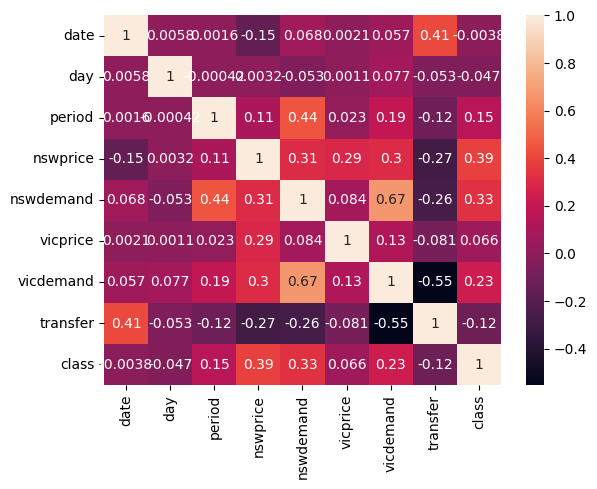

In [15]:
sns.heatmap(data.corr(), annot=True);

In [16]:
numeric_ = [column for column in data.columns if column != 'class']
corr_matrix = data[numeric_].corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

print(sol)

nswdemand  vicdemand    0.667174
vicdemand  transfer     0.552870
period     nswdemand    0.444579
date       transfer     0.405853
nswprice   nswdemand    0.306982
           vicdemand    0.304492
           vicprice     0.288349
           transfer     0.274764
nswdemand  transfer     0.264476
period     vicdemand    0.192153
date       nswprice     0.153561
vicprice   vicdemand    0.125489
period     transfer     0.115437
           nswprice     0.105341
nswdemand  vicprice     0.083510
vicprice   transfer     0.081112
day        vicdemand    0.076904
date       nswdemand    0.067692
           vicdemand    0.057239
day        transfer     0.053012
           nswdemand    0.052946
period     vicprice     0.022706
date       day          0.005840
day        nswprice     0.003168
date       vicprice     0.002110
           period       0.001577
day        vicprice     0.001082
           period       0.000416
dtype: float64


Construct histograms of the distributions for all predictors. We recommend using `plt.hist()`. Determine the feature from the following hist image, the number of baskets is 20.

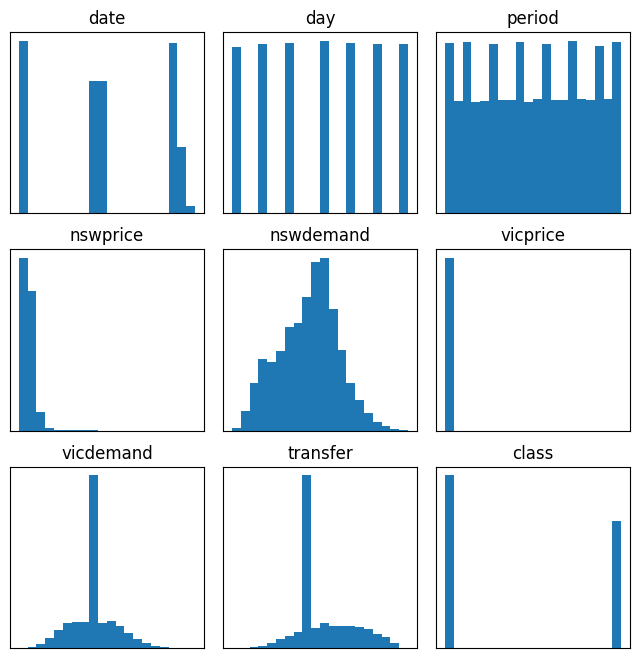

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
for i, axi in enumerate(ax.flat):
    axi.hist(data[numeric[i]], bins=20)
    axi.set_title(numeric[i])

From the resulting illustrations, we can see that there is probably some periodicity in the data, as expected. Moreover, it seems that the missing values and outlier processing has already been done for us.

Use <code>train_test_split</code> to split the resulting dataset into training and test samples with the parameters: `test_size=0.2, random_state=29`.

In [37]:
df_pca = data[['nswdemand', 'vicdemand']]

from sklearn.decomposition import PCA

pca = PCA(n_components=1, svd_solver='full').fit_transform(df_pca)
df = pd.DataFrame(pca, columns=['nswdemand vicdemand'])  # создаём дата-фрейм
df.head()

,nswdemand vicdemand
0,-0.096584
1,-0.159339
2,-0.023015
3,-0.040252
4,0.037495


In [38]:
data_pca = data.copy(deep=True)

data_pca.drop(axis=1, columns=['nswdemand', 'vicdemand'], inplace=True)
data_pca['nswdemand vicdemand'] =  df

In [41]:
numeric_pca = data_pca.columns

In [51]:
X = data[numeric_]
y = data[['class']]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)#, stratify=y)

# Random Forests Classifier

Train the <code>sklearn.ensemble.RandomForestClassifier</code> model on the training dataset with the parameters: `random_state=29`.

In [55]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=29)
clf = clf.fit(X_train, y_train)

In [56]:
y_pred = clf.predict(X_train)

Build the <code>classification_report</code> of the resulting model on **training dataset**. Enter the accuracy of the model on the **training dataset**.

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred, digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     16668
           1      1.000     1.000     1.000     12331

    accuracy                          1.000     28999
   macro avg      1.000     1.000     1.000     28999
weighted avg      1.000     1.000     1.000     28999



We got overfitting. Well, once again, we can answer that decision trees are quite prone to overtraining.

## Adding GridSearchCV to the Random Forest.

Using the <code>sklearn.model_selection.GridSearchCV</code>, train <code>RandomForestClassifier</code> on training dataset with the parameters:

```
GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=29),
    params_grid,
    verbose=4,
    cv=3).
```

Parameters to be selected:

```
params_grid = {'n_estimators': [100,300,500],
  'max_leaf_nodes': list(range(6,10)),
  'min_samples_leaf': [1,2,3]}
```

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,300,500],
               'max_leaf_nodes': list(range(6,10)),
               'min_samples_leaf': [1,2,3]
               }

clf1 = RandomForestClassifier(bootstrap=False,
                              class_weight='balanced',
                              n_jobs=-1,
                              max_features='sqrt',
                              random_state=29)

cv = GridSearchCV(estimator = clf1,
                  verbose=4,
                  cv=3,
                  param_grid=param_grid)

cv.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.772 total time=   2.0s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.768 total time=   3.8s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.774 total time=   2.9s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.768 total time=   4.8s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.767 total time=   3.6s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.772 total time=   5.5s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.772 total time=   6.7s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.770 total time=   6.3s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.772 total time=   8.1s
[CV 1/3] END max_leaf_nodes=6

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=29),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

Select the best model. We recommend using the field <code>best_estimator_</code> of the <code>grid_search</code> class object. We can find the parameters of the best model in the field <code>best_params_</code> of this object.

In [59]:
cv.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_leaf_nodes=9, n_estimators=500, n_jobs=-1,
                       random_state=29)

In [60]:
cv.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'n_estimators': 500}

Build the <code>classification_report</code> of the resulting model on the **training dataset**.
Enter the model accuracy on the **training dataset**.

In [61]:
cv.score(X_train, y_train)

0.7861650401737991

In [62]:
y_pred1 = cv.predict(X_train)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred1, digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      0.779     0.876     0.825     16668
           1      0.798     0.665     0.726     12331

    accuracy                          0.786     28999
   macro avg      0.789     0.770     0.775     28999
weighted avg      0.788     0.786     0.783     28999



Build the <code>classification_report</code> of the resulting model on the **test dataset**.
Enter the model accuracy on the **test dataset**.

In [64]:
cv.score(X_test, y_test)

0.7867586206896552

In [65]:
print(classification_report(y_test, cv.predict(X_test), digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      0.782     0.875     0.826      4192
           1      0.796     0.665     0.725      3058

    accuracy                          0.787      7250
   macro avg      0.789     0.770     0.775      7250
weighted avg      0.788     0.787     0.783      7250



Overfitting has been avoided, but accuracy seems low.

One of the advantages of random forest is that you can look at the importance of features when classifying (inverse problem). Importance values can be found in the field <code>feature_importances_</code> of the model. Identify the name of the most important feature of the model.

<Axes: >

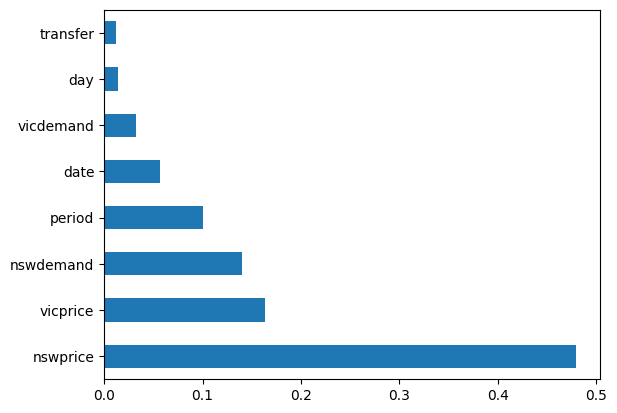

In [76]:
importances = cv.best_estimator_.feature_importances_

importances_series = pd.Series(importances, index=X_train.columns)

importances_series.nlargest(20).plot(kind='barh')

Let's try to improve the results by using other types of ensembles.

# Voting Classifier

Trains all models given as input and predicts the final result either by the greater number of identical answers that the models gave (hard), or calculates the probability of assigning objects to classes across all models and takes argmax.

Use an <code>sklearn.ensemble.VotingClassifier</code> object with the parameter <code>voting='hard'</code>. Use the following classifiers with appropriate parameters as base algorithms:`LogisticRegression(solver='liblinear', random_state=29), SVC(random_state=29), SGDClassifier(random_state=29)`. Train the model on the training dataset.

In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

clf1 = LogisticRegression(solver='liblinear', random_state=29)
clf2 = SVC(random_state=29)
clf3 = SGDClassifier(random_state=29)

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('svm', clf2), ('sgdc', clf3)],
    voting='hard')

eclf = eclf.fit(X_train, y_train)

Enter the model accuracy on the **training dataset**.

In [67]:
y_pred2 = eclf.predict(X_train)
print(classification_report(y_train, y_pred2, digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      0.716     0.921     0.806     16668
           1      0.825     0.507     0.628     12331

    accuracy                          0.745     28999
   macro avg      0.771     0.714     0.717     28999
weighted avg      0.763     0.745     0.730     28999



Enter the model accuracy on the **test dataset**.

In [68]:
y_pred3 = eclf.predict(X_test)
print(classification_report(y_test, y_pred3, digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      0.720     0.916     0.806      4192
           1      0.816     0.513     0.630      3058

    accuracy                          0.746      7250
   macro avg      0.768     0.714     0.718      7250
weighted avg      0.761     0.746     0.732      7250



# Bagging Classifier

Creates multiple objects of the same class (multiple models) and trains them on non-overlapping subsets of the training dataset, and further averages the predictions.

Based on <code>sklearn.ensemble.BaggingClassifier</code>, using <code>DecisionTreeClassifier</code> train the model on the training dataset with the parameters
```
BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5,
    max_features=0.5,
    bootstrap=False,
    random_state=29
)
```

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'),
                       max_samples=0.5,
                       max_features=0.5,
                       bootstrap=False,
                       random_state=29
)

bg.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5, random_state=29)

Enter the model accuracy on the **training dataset**.

In [79]:
round(bg.score(X_train, y_train), 3)

0.976

Enter the model accuracy on the **test dataset**.

In [80]:
y_pred4 = bg.predict(X_test)
print(classification_report(y_test, y_pred4, digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      0.822     0.903     0.861      4192
           1      0.847     0.731     0.785      3058

    accuracy                          0.831      7250
   macro avg      0.834     0.817     0.823      7250
weighted avg      0.832     0.831     0.829      7250



# Gradient Boosting Classifier

Gradient boosting works like this: several objects of a class (several models) are created, they are chained so that each next one tries to correct the errors of the previous one. Prone to overlearning.

Train a model based on <code>sklearn.ensemble.GradientBoostingClassifier</code> on training dataset with the parameters ```n_estimators=500, learning_rate=0.8, random_state=29, max_depth=2```.

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=29, max_depth=2)

gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8984827586206896

Enter the model accuracy on the **training dataset**.

In [84]:
round(gbc.score(X_train, y_train), 3)

0.93

Enter the model accuracy on the **test dataset**.

In [83]:
y_pred5 = gbc.predict(X_test)
print(classification_report(y_test, y_pred5, digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      0.908     0.917     0.913      4192
           1      0.885     0.872     0.879      3058

    accuracy                          0.898      7250
   macro avg      0.897     0.895     0.896      7250
weighted avg      0.898     0.898     0.898      7250



# AdaBoost Classifier

It works in a similar way to gradient boosting, however subsequent models do not try to correct the error of the previous ones: the first object is trained on the entire dataset, and the next one updates its weights based on the experience of the previous one in a way that corrects erroneous predictions.

Based on <code>sklearn.ensemble.AdaBoostClassifier</code>, using <code>DecisionTreeClassifier</code>, train the model with the parameters

```
AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state=29)
```

In [86]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                               class_weight='balanced'),
                         n_estimators=300,
                         learning_rate=0.5,
                         random_state=29)
abc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300, random_state=29)

Enter the model accuracy on the **training dataset**.

In [92]:
round(abc.score(X_train, y_train), 3)

0.939

Enter the model accuracy on the **test dataset**.

In [93]:
y_pred6 = abc.predict(X_test)
print(classification_report(y_test, y_pred6, digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      0.926     0.902     0.914      4192
           1      0.870     0.901     0.885      3058

    accuracy                          0.902      7250
   macro avg      0.898     0.902     0.900      7250
weighted avg      0.902     0.902     0.902      7250



# Stacking Classifier

Trains multiple class objects (multiple models) on the entire dataset, and then trains a separate classifier on the metdata - the predictions obtained by the previously trained models.

Use the <code>sklearn.ensemble.StackingClassifier</code> object. Train a model based on `sklearn.ensemble.StackingClassifier`. Basic estimators: `RandomForestClassifier(random_state=29), SVC(random_state=29)`. Final estimator: `LogisticRegression(random_state=29)`. Train the model on the training dataset.

In [89]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(random_state=29)),
              ('svc', SVC(random_state=29))
              ]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=29))

sc.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=29)),
                               ('svc', SVC(random_state=29))],
                   final_estimator=LogisticRegression(random_state=29))

Enter the model accuracy on the **training dataset**.

In [90]:
round(sc.score(X_train, y_train), 3)

1.0

Enter the model accuracy on the **test dataset**.

In [94]:
y_pred7 = sc.predict(X_test)
print(classification_report(y_test, y_pred7, digits=3, labels = [0, 1]))

              precision    recall  f1-score   support

           0      0.912     0.922     0.917      4192
           1      0.891     0.878     0.885      3058

    accuracy                          0.903      7250
   macro avg      0.902     0.900     0.901      7250
weighted avg      0.903     0.903     0.903      7250

